ДЗ Сираевой Г.М. по продвинутому pandas

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

Задание: Результаты п.8 с помощью matplotlib визуализировать

In [3]:
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/Titanic-Dataset.csv'
df = pd.read_csv(url, header='infer', sep = ',', na_values = ['na',], encoding='utf-8')
df

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.Age = df.Age.fillna(df.Age.mean())
df.Cabin = df.Cabin.fillna(method="bfill")
df.Cabin = df.Cabin.fillna(method="ffill")
df.Embarked = df.Embarked.fillna(method="bfill")
df.Embarked = df.Embarked.fillna(method="ffill")

In [5]:
df.isna().sum().sum()

0

In [6]:
df.isnull().T.any().T.sum()

0

На основе ранее проведенного анализа (п.8 ДЗ №4), влияние на признак Survived оказывает Pclass, Fare, Embarked, Sex.


Посмотрим с помощью графиков данные по этим признакам:

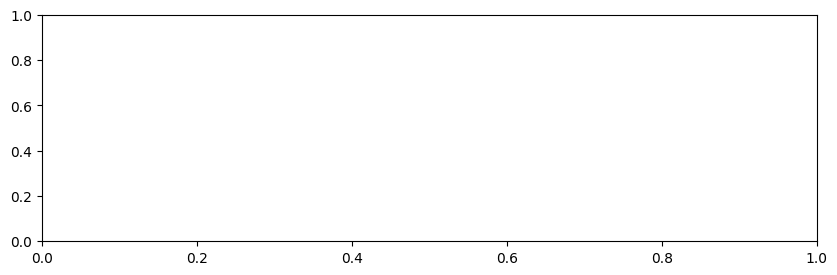

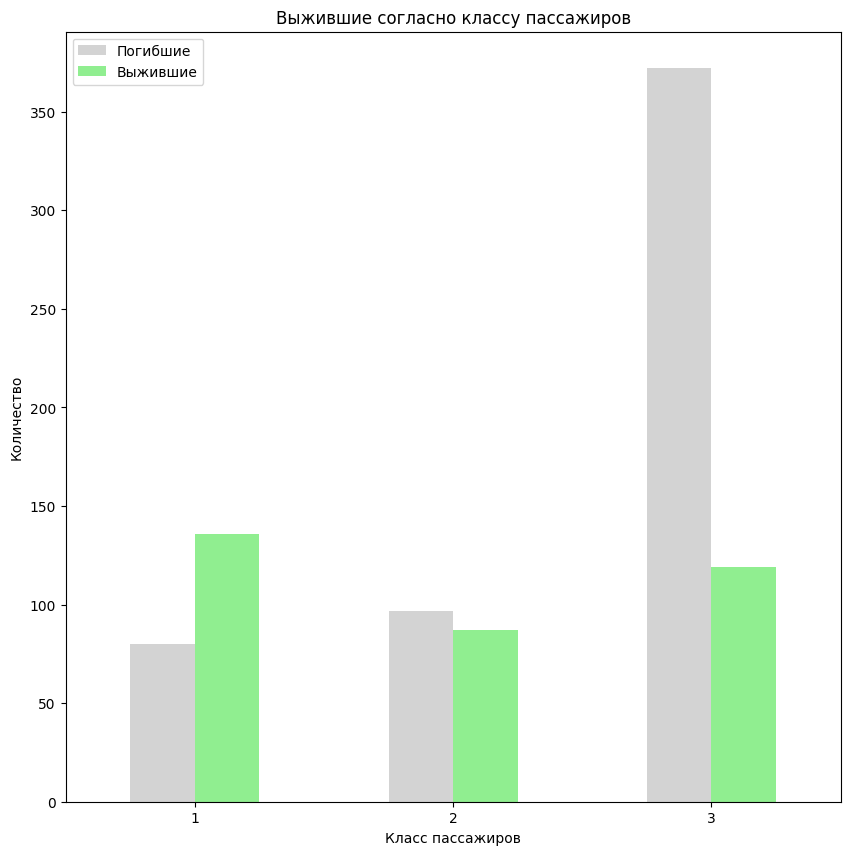

In [83]:
plt.rc('figure', figsize=(10, 10))

pclass_pl = df.groupby('Pclass')['Survived'].value_counts().unstack()

plt.subplot(311)
pclass_pl.plot(kind = 'bar', color=['lightgrey','lightgreen'])

plt.legend(('Погибшие', 'Выжившие'))
plt.title('Выжившие согласно классу пассажиров')
plt.ylabel('Количество')
plt.xlabel('Класс пассажиров')
plt.xticks(rotation=0)

plt.show();

На основе графика можно утверждать, что для пассажиров 1-го класса количество выживших больше, чем для остальных классов. Для 3-го класса количество погибших заметно больше, чем выживших.

In [59]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

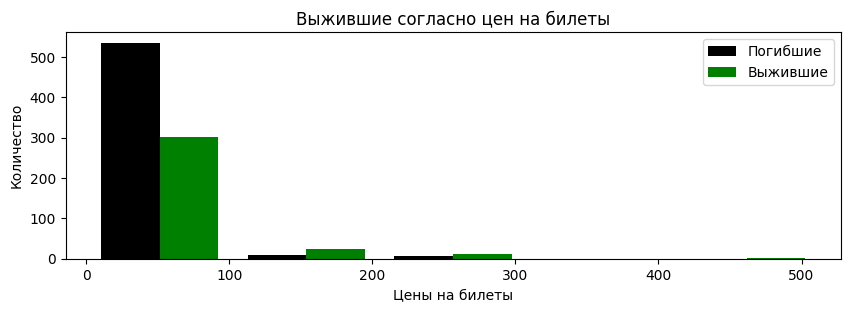

In [65]:
plt.rc('figure', figsize=(10, 10))

df1 = df[df['Survived'] == 0]['Fare']
df2 = df[df['Survived'] == 1]['Fare']

max_Fare = int(math.ceil(df.Fare.max()))
plt.subplot(311)
plt.hist([df1, df2], bins = 5, range=(0, max_Fare), color=['black','green'])

plt.legend(('Погибшие', 'Выжившие'), loc='best')
plt.title('Выжившие согласно цен на билеты')
plt.ylabel('Количество')
plt.xlabel('Цены на билеты')

plt.show()

У пассажиров со стоимостью билетов до 100 фунтов больше погибших, чем выживших.

Чем выше стоимость билета, тем выживших больше.

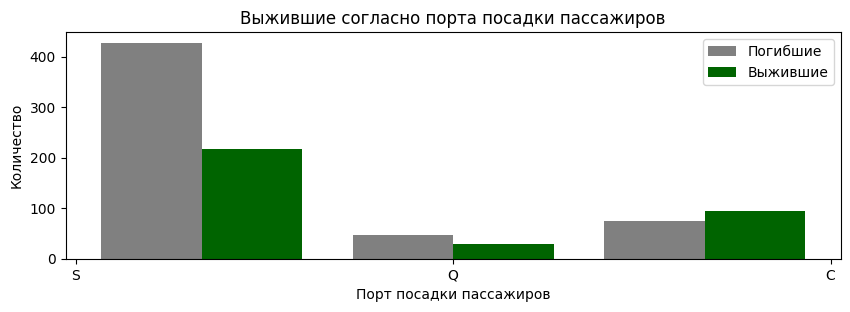

In [39]:
plt.rc('figure', figsize=(10, 10))

df1 = df[df['Survived'] == 0]['Embarked']
df2 = df[df['Survived'] == 1]['Embarked']

plt.subplot(311)
plt.hist([df1, df2], bins = 3, color=['grey','darkgreen'])

plt.legend(('Погибшие', 'Выжившие'), loc='best')
plt.title('Выжившие согласно порта посадки пассажиров')
plt.ylabel('Количество')
plt.xlabel('Порт посадки пассажиров')

plt.show()

На графике видим распределение доли выживших и погибших для различных портов посадки на Титаник. Для порта Cherbourg количество выживших превышает количество погибших.

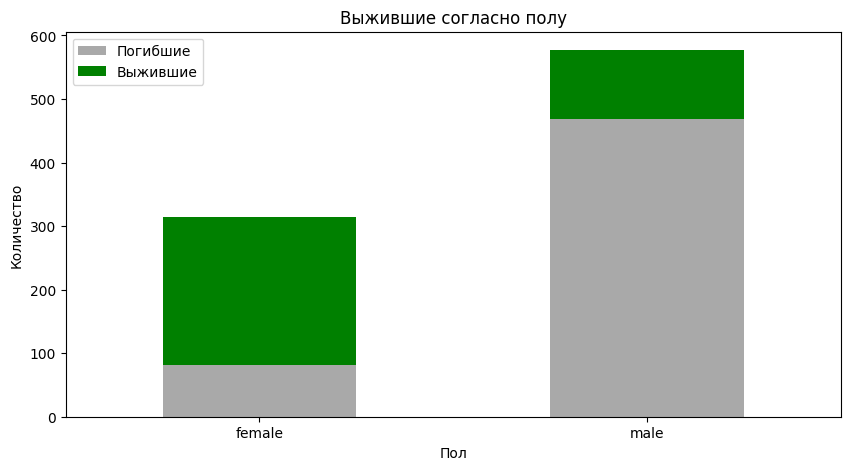

In [73]:
plt.rc('figure', figsize=(10, 5))

sex_df = df.groupby('Sex')['Survived'].value_counts().unstack()
sex_df.plot(kind='bar', color=['darkgrey','green'], stacked=True)

plt.legend(('Погибшие', 'Выжившие'), loc='best')
plt.title('Выжившие согласно полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)

plt.show()

Из графика видим, что для женщин характерно большее количество выживших, чем погибших. У мужчин - наоборот.